In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

## Regressão com uma variável

In [142]:
data = pd.read_csv('../T1/data/ex1data1.txt', header=None)

In [143]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [190]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [191]:
params = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsRegressor(weights = 'distance')

search = RandomizedSearchCV(knn, params, n_iter=20, cv=5, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

k = search.best_params_['n_neighbors']
best_score = np.sqrt(-search.best_score_)

print(f'RMSE melhor modelo: {best_score}')
print(f'Usando k = {k}')

model = search.best_estimator_
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

RMSE melhor modelo: 2.803480846064765
Usando k = 6
Score do modelo: 4.573235950443419


In [233]:
params = {'max_depth': [None] + list(range(2, 31)),'criterion': ['mse', 'friedman_mse', 'mae']}
dt = DecisionTreeRegressor()

search = RandomizedSearchCV(dt, params, n_iter=20, cv=5, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

max_depth = search.best_params_['max_depth']
criterion = search.best_params_['criterion']
best_score = np.sqrt(-search.best_score_)

print(f'RMSE melhor modelo: {best_score}')
print(f'Altura da árvore: {max_depth}')
print(f'Critério de qualidade da divisão: {criterion}')

model = search.best_estimator_
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

RMSE melhor modelo: 0.1690308509457033
Altura da árvore: 10
Critério de qualidade da divisão: mae
Score do modelo: 0.3651483716701107


## Regressão com múltiplas variáveis

In [465]:
data = pd.read_csv('../T1/data/ex1data2.txt', header=None)

In [466]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [467]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [468]:
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)

params = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsRegressor(weights = 'distance')

search = RandomizedSearchCV(knn, params, n_iter=20, cv=10, scoring='neg_mean_squared_error')
search.fit(X_train_norm, y_train)

k = search.best_params_['n_neighbors']
best_score = np.sqrt(-search.best_score_)

print(f'RMSE melhor modelo: {best_score}')
print(f'Usando k = {k}')

model = search.best_estimator_
X_test_norm = ss.fit_transform(X_test)
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

RMSE melhor modelo: 0.22238822449555887
Usando k = 4
Score do modelo: 0.7719415567373592


In [252]:
params = {'max_depth': [None] + list(range(2, 31)),'criterion': ['mse', 'friedman_mse', 'mae']}
dt = DecisionTreeRegressor()

search = RandomizedSearchCV(dt, params, n_iter=20, cv=10, scoring='neg_mean_squared_error')
search.fit(X_train_norm, y_train)

max_depth = search.best_params_['max_depth']
criterion = search.best_params_['criterion']
best_score = np.sqrt(-search.best_score_)

print(f'RMSE melhor modelo: {best_score}')
print(f'Altura da árvore: {max_depth}')
print(f'Critério de qualidade da divisão: {criterion}')

model = search.best_estimator_
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

RMSE melhor modelo: 0.18257418583505536
Altura da árvore: 16
Critério de qualidade da divisão: mse
Score do modelo: 1.0645812948447542


## Aprendizado de classificadores

In [473]:
data = pd.read_csv('../T1/data/ex2data1.txt', header=None)

In [474]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [477]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [314]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

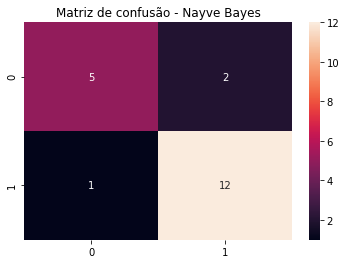

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.86      0.92      0.89        13

    accuracy                           0.85        20
   macro avg       0.85      0.82      0.83        20
weighted avg       0.85      0.85      0.85        20



In [320]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True)
plt.title('Matriz de confusão - Nayve Bayes')
plt.show()
print(classification_report(y_test, y_pred_nb))

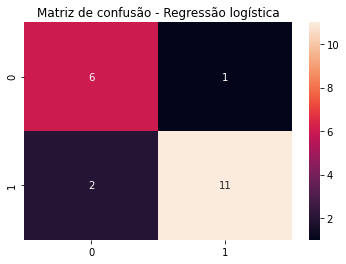

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20



In [321]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
cm_lr = metrics.confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True)
plt.title('Matriz de confusão - Regressão logística')
plt.show()
print(classification_report(y_test, y_pred_lr))

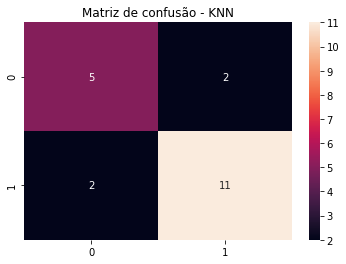

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.85      0.85      0.85        13

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20



In [322]:

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True)
plt.title('Matriz de confusão - KNN')
plt.show()
print(classification_report(y_test, y_pred_knn))

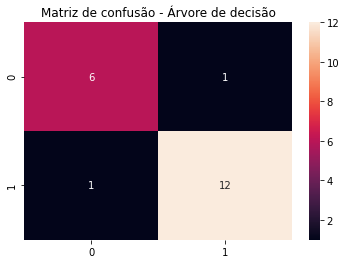

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.92      0.92      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20



In [323]:

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
cm_dt = metrics.confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True)
plt.title('Matriz de confusão - Árvore de decisão')
plt.show()
print(classification_report(y_test, y_pred_dt))

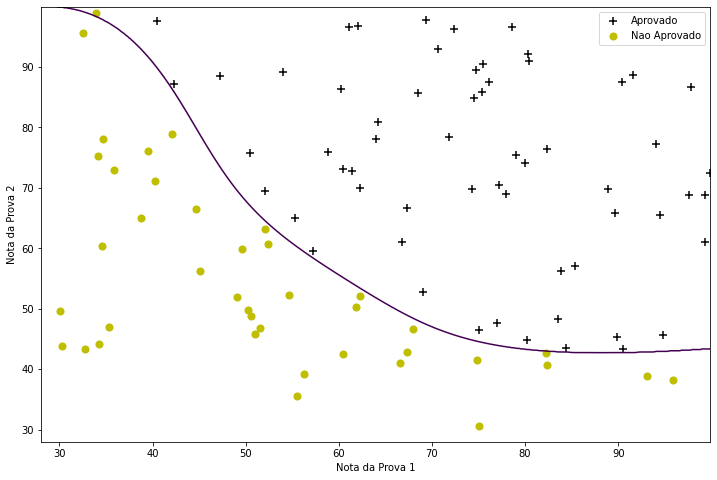

In [457]:
poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(X_train)
model_lr_poly = LogisticRegression()
model_lr_poly.fit(X_train_poly, y_train)

xx, yy = np.mgrid[0:100:.1, 0:100:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.fit_transform(grid)
probs = model_lr_poly.predict_proba(grid_poly)[:, 1].reshape(xx.shape)

pos = X[y == 1]
neg = X[y == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos[:, :-1], pos[:, -1:], s=50, c='k', marker='+', label='Aprovado')
ax.scatter(neg[:, :-1], neg[:, -1:], s=50, c='y', marker='o', label='Nao Aprovado')
ax.contour(xx, yy, probs, levels=[0.5])
ax.legend()
ax.set_xlabel('Nota da Prova 1')
ax.set_ylabel('Nota da Prova 2')
plt.show()

## Regularização

In [517]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import scipy.io as spio

In [621]:
data = spio.loadmat('../T1/data/ex5data1.mat', squeeze_me=True)
X, y = data['X'].reshape(-1, 1), data['y']
X_test, y_test = data['Xtest'].reshape(-1, 1), data['ytest']
X_val, y_val = data['Xval'].reshape(-1, 1), data['yval']

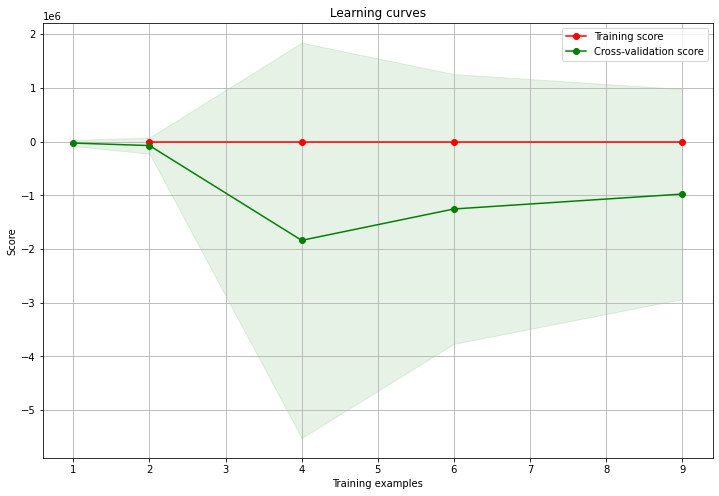

In [622]:
#
model = LinearRegression()
#model.fit(X, y)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
train_sizes = np.linspace(.1, 1.0, 5)

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(model, X, y, n_jobs=4, train_sizes=train_sizes, return_times=True)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Learning curves")
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
ax.grid()
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
ax.legend(loc="best")
plt.show()

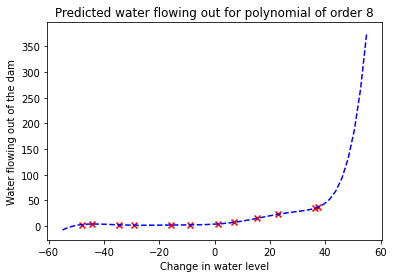

In [661]:
poly = PolynomialFeatures(8)
X_poly = poly.fit_transform(X)

ss = StandardScaler()
X_poly_norm = X_poly
X_poly_norm[:, 1:] = ss.fit_transform(X_poly[:, 1:])

model = LinearRegression()
model.fit(X_poly_norm, y)

xvalue = np.linspace(-55, 55, 50).reshape((-1, 1))
xpoly = poly.fit_transform(xvalue)

mean = ss.mean_
std = np.sqrt(ss.var_)

xpolynorm = xpoly
xpolynorm[:, 1:] = (xpoly[:, 1:] - mean) / std

plt.scatter(X, y, color='red', marker='x')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.plot(xvalue, model.predict(xpolynorm), "b--")
plt.title("Predicted water flowing out for polynomial of order 8")
plt.show()